# **Analiza statystyczna zbioru danych dot. ślimaków zwanych słuchotkami (lub uchowcami)**

**Importowanie pakietu pandas, numpy i matplotlib oraz wyświetlenie ich wersji**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib
import matplotlib.pyplot as plt
from IPython.core.display import display

print(f'\nWersja pakietu pandas: {pd.__version__}')
print(f'Wersja pakietu numpy: {np.__version__}')
print(f'Wersja pakietu matplotlib: {matplotlib.__version__}')



Wersja pakietu pandas:  1.3.4
Wersja pakietu numpy:  1.21.4
Wersja pakietu matplotlib:  3.5.0


**Importowanie danych z pliku csv oraz nadanie nazw kolumnom**

In [2]:
col_names = ['sex', 'length', 'diameter',
            'height', 'whole weight', 'shucked weight',
            'viscera weight', 'shell weight', 'rings']

data = pd.read_csv('data.csv', names=col_names)

*Wymagania na ocenę dostateczną:*

1. Tabela dla cechy jakościowej

In [3]:
counts = data['sex'].value_counts()
percentage = [(count / data['sex'].count())*100 for count in counts]

percentage = pd.Series(percentage, index = ['M', 'I', 'F']).round(2)

output_qualitative = pd.concat([counts, percentage], axis = 1)
output_qualitative.columns = ['count', 'percentage']

display(output_qualitative)

,count,percentage
M,1528,36.58
I,1342,32.13
F,1307,31.29


2. Tabela dla cech ilościowych

In [4]:
length = data['length']

mean_values = data.loc[:, data.columns != 'sex'].mean()
std_values = data.loc[:, data.columns != 'sex'].std()
min_values = data.loc[:, data.columns != 'sex'].min()
first_quartile = data.loc[:, data.columns != 'sex'].quantile(0.25)
median = data.loc[:, data.columns != 'sex'].quantile(0.5)
third_quartile = data.loc[:, data.columns != 'sex'].quantile(0.75)
max_values = data.loc[:, data.columns != 'sex'].max()


output_quantitative = pd.concat([mean_values, std_values, min_values, first_quartile,
                                 median, third_quartile, max_values], axis = 1)

output_quantitative.columns = ['mean', 'std', 'min', '25%', '50%', '75%', 'max']

display(output_quantitative)

,mean,std,min,25%,50%,75%,max
length,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
diameter,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
height,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
whole weight,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
shucked weight,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
viscera weight,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
shell weight,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
rings,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


3. Wykres słupkowy liczebności poszczególnych wariantów cechy jakościowej

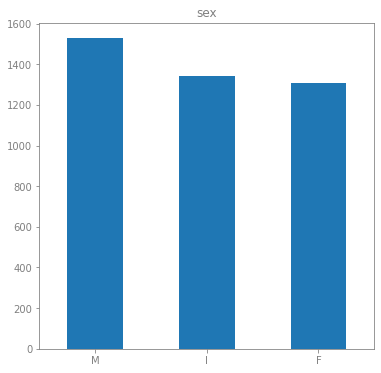

In [5]:
params = {'ytick.color' : 'grey',
          "xtick.color" : 'grey',
          'axes.labelcolor' : 'grey',
          'axes.edgecolor' : 'grey',
          'figure.figsize' : [6, 6],
          'text.color': 'grey'
          }

plt.rcParams.update(params)

plot_qualitative = data['sex'].value_counts().plot.bar(rot = 0, title = 'sex')


4. Histogramy cech ilościowych

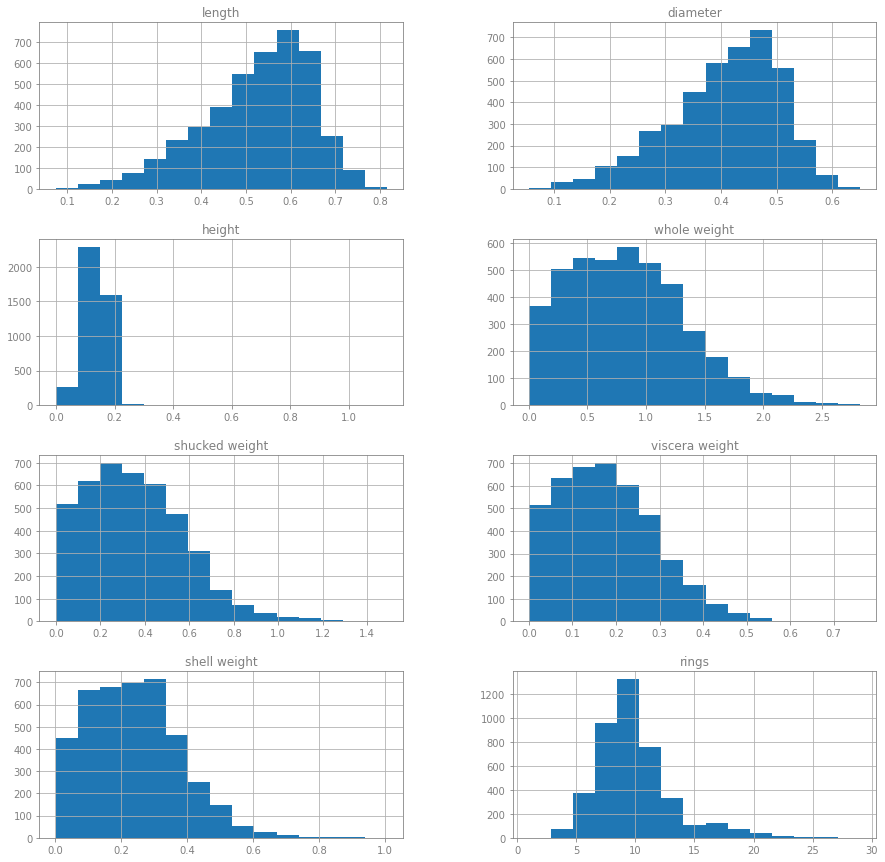

In [6]:
plt.rcParams['figure.figsize'] = 15, 15

histogram_quantitative = data.hist(layout = [4, 2], bins = 15)

*Wymagania na ocenę dobrą*

**1. Wymagania na ocenę dostateczną (*powyżej*)**

**2. Wykresy punktowe dla cech ilościowych.**

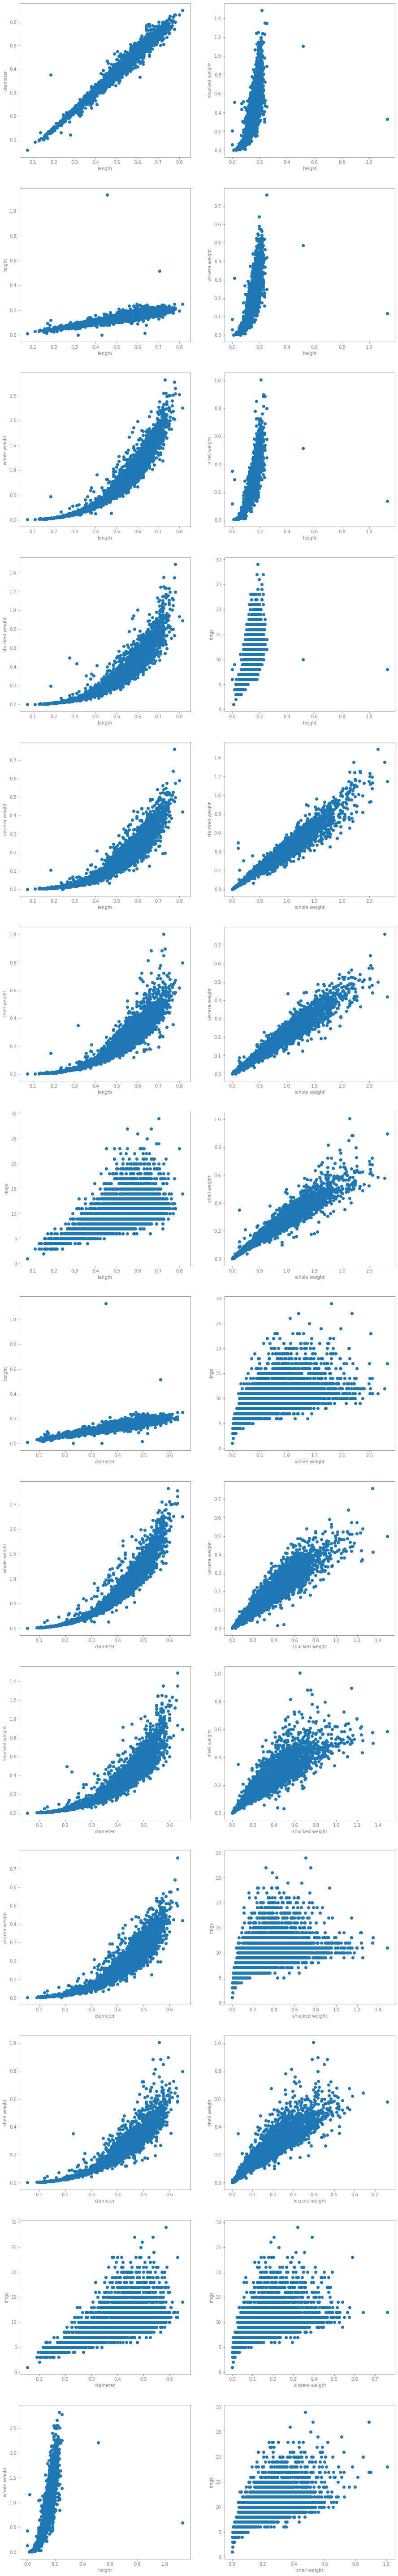

In [7]:
fig, axs = plt.subplots(nrows = 14, ncols = 2, figsize = (15, 105))

data_quantitative = data.select_dtypes(np.number)

counter = 0

for idx, valx in enumerate(data_quantitative):
    for idy, valy in enumerate(data_quantitative):
        if valx != valy and idy > idx:
            axs[counter % 14, counter // 14].scatter(data_quantitative[valx], data_quantitative[valy])
            axs[counter % 14, counter // 14].set_xlabel(data_quantitative.columns[idx])
            axs[counter % 14, counter // 14].set_ylabel(data_quantitative.columns[idy])
            counter += 1


**3. Tabela macierzy korelacji liniowej dla cech ilościowych.**

In [8]:
data.corr()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


**4. Mapa cieplna reprezentująca macierz korelacji liniowej.**

<AxesSubplot:>

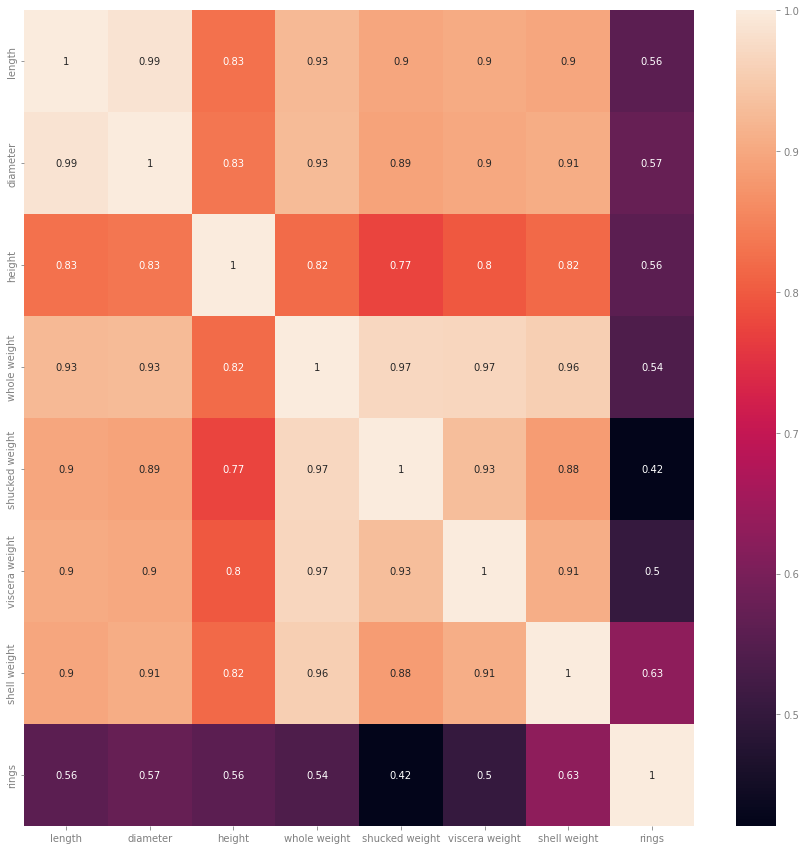

In [9]:
# mask = np.zeros_like(data.corr())
# mask[np.triu_indices_from(mask)] = True
# sea.heatmap(data.corr(), annot = True, mask = mask)
sea.heatmap(data.corr(), annot = True)

**5. Wykres regresji liniowej dla dwóch cech ilościowych najmocniej skorelowanych liniowo.**

<AxesSubplot:xlabel='diameter', ylabel='length'>

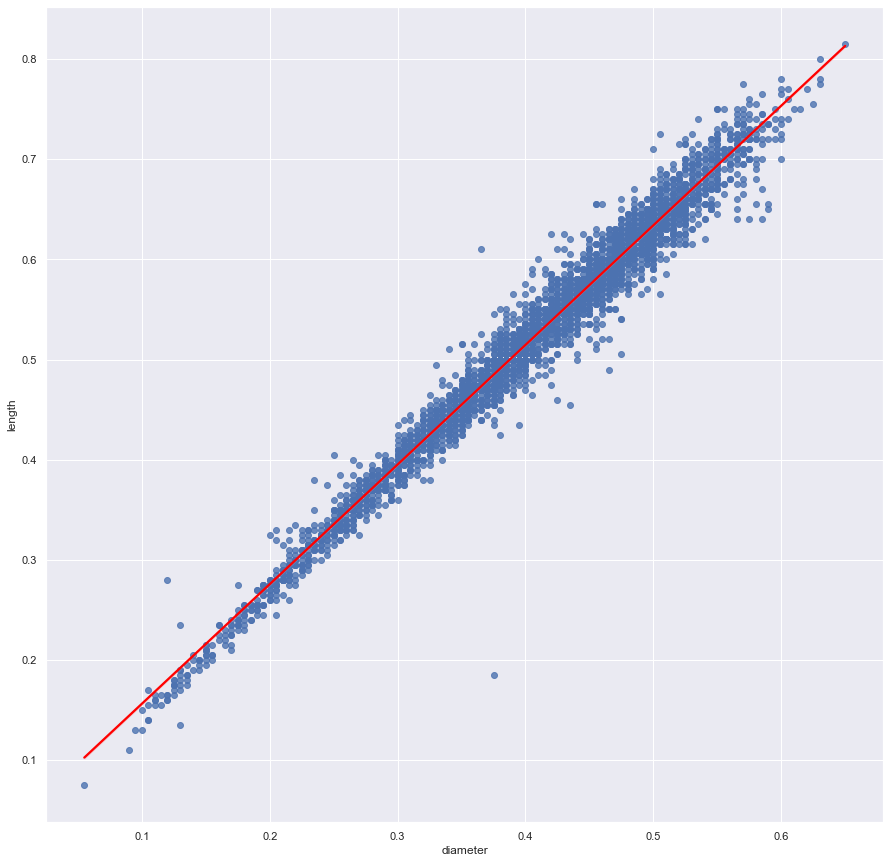

In [10]:
sea.set_theme(color_codes=True)

sea.regplot(x = 'diameter', y = 'length', data = data_quantitative, line_kws={"color": "red"})


*Wymagania na ocenę bardzo dobrą*

**1. Wymagania na ocenę dobrą (*powyżej*)**

**2. Tabela miar rozkładu cech ilościowych z uwzględnieniem cech jakościowych.**
